In [1]:
################################
#        RUN THIS CELL
################################
from IPython.core.display import HTML
HTML("style.css")


<div class='header_teagreen'>

# <img style="float: left; padding-right: 10px; width: 60px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC295/CS287/E-115B: Deep Learning for NLP

<br/>
<hr color=black>

## Homework 2: Recurrent Neural Networks and Machine Translation
### THE TEA GREEN BOOK

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructor**: Chris Tanner<br/>
**Release Date**: September 21 (Tues)<br/>
<font color="red">**Due Date**: October 5 (Tues) @ 11:59pm (EST)</font>

<hr color=black>
<center>
<div class='quote'>

_"We don't speak the same language [...] you missin' every single shot that you ain't taken"_

    Malcolm McCormick (August 3, 2018)
</div>
</center>
</div>

<div class='header_teagreen'>
    
# OVERVIEW

</div>
<br/>
This assignment spans the content covered in the following lectures:

- **Lecture 5:** Recurrent Neural Networks (RNNs)
- **Lecture 6:** LSTMs
- **Lecture 7:** seq2seq + Attention
- **Lecture 8:** Machine Translation

Language is inherently sequential in nature, which makes it conducive to models that can capture the contextual, long-range dependencies. Toward this, you will first gain experience working with a simple RNN. The RNN aims to capture the data's meaning in its hidden layer (like all neural models), which will be used toward a classification task (sentiment analysis of IMDb movies).

After seeing the effectiveness of this basic model, you will then extend this model for two missions. As a warm-up, we would like you to try your hand on performing sentiment analysis on an IMDB review dataset. Afterwards, your *true* mission, should you accept, is to make a complete Machine Translation system. There are some evil hackers on the Dark Web who are stealing and selling others' personal information, financial documents, CS287 assignments, etc. To make their operation covert, they are speaking in a "Mystery Language". Forensics suspect their mystery language is actually one of the following languages:
- Danish
- English
- German
- Finnish
- Spanish

You are tasked with determining the true identity of their mystery language, so that their words can be read and understood. Help save the day and keep everyone's data safe (for now). ~~This tape will self-destruct in five seconds.~

As a heads-up, this assignment is shorter than Homework 1, as we wanted to provide you all with more time to focus on research. This pattern will persist, as each homework assignment will be shorter than the previous. With that said, the models at hand are increasing in complexity, and thus please ensure you allocate sufficient time to building, debugging, and running the models. For example, the last part of Problem 2 (programming) requires you to run your model on 5 different corpora. Our solutions can train the full model in just a few minutes (i.e., 1-5); however, if your solution is overwhelmingly slow, the total running time can start to become a hindrance.

If your code runs slowly on your own local machine, you are free to run your code on [Google Colab](https://colab.research.google.com/) -- just be mindful that the academic policy is still in tact, and that nobody else should have access to your code. In terms of grading, in general, we will not be too picky with the _efficiency_ of your code, unless it's egregious. Having a sound solution is the most important.

<div class='header_teagreen'>
    
# LEARNING OBJECTIVES

</div>
<br/>

The purpose of this homework is to help you:

- understand the sequential nature of language
- develop a strong foundation in working with recurrent networks
- gain experience working with text classification
- understand the mechanics of a basic, neural Machine Translation system
- think critically about how language can be used and leveraged (e.g., for classification and translation), while recognizing strengths and weaknesses.

To assist you reach these learning objectives, this homework is structured into three parts:
- <span style="background-color: #FDFFB6"><b>Foundation (concepts):</b></span> demonstrate an understanding of the core concepts taught in lectures
- <span style="background-color: #FFC8C8"><b>Application (programming):</b></span> gain experience putting that knowledge into practice 
- <span style="background-color: #CAFFBF"><b>Research (creating new knowledge):</b></span> use your current NLP knowledge and skills to go beyond the course material, to grasp cutting-edge results and to critically accept or challenge that information. This serves as practice for you to research your own NLP interests and to be well-equipped to continuously learn the latest, greatest NLP work.

<div class='header_teagreen'>
    
## SUPPORT

</div>

- **Supplemental Resources:** See the list of [supplemental resources](https://harvard-iacs.github.io/CS287/supplemental) for a wealth of rich information concerning Machine Learning, NLP, and Math. Some of the courses listed concern the exact topics covered in this homework and lectures.
- **Sanity Check cells:** Throughout the homeworks, we sometimes provide 'sanity check' cells which allow you to see our expected outputs. You should ensure your code produces the same. <span style="background-color: #FDFFB6"><b>**NOTE:** We are not claiming that passing the sanity check cells indicates that you have _fully_ implemented everything correctly; rather, they provide simple checks to help inform you if you are on the right track.</span>
- **Ed**: If you are stuck on anything conceptual (not code) about the content from lectures, please post a question on Ed. This is your community, and please contribute and help each other out. If your questions concern the homework, you can post these on Ed, too, but make sure you are not posting any of your code or solutions in general. If you think you've spotted a bug in our homework questions, or something that needs clarifying, please let us know on Ed! <span style="background-color: #FDFFB6">Extra credit will be awarded for bugs.</span> We want to correct these issues ASAP.
- **OH:** After having given a wholehearted attempt, if you are having trouble with the homework, please come to Office Hours.
- **Classmates:** We have a strict policy about the homeworks being individual. You are free to discuss _concepts_ with one another, to help each other learn the material. However, no student shall ever discuss their solutions or see another student's solutions to any problem. Once you see someone's coding solution, it's nearly impossible to harness that information in a way that you can write your own unique solution. You've been robbed of a learning opportunity and will likely just regurgitate someone else's work. As a reminder, if you want to take a shortcut on any problem by looking online for already-existing solutions, that's permissible, but you must cite your sources. Otherwise, it constitutes cheating. Posting any pieces of this homework online for others to see if a flagrant violation of our academic policy.
- **Other:** I want everyone to be and feel fully supported. If there's anything else we, as a teaching staff, can do to further assist in your learning, please let us know. Related, at the end of this homework assignment, you are expected to complete an anonymous feedback form. I urge you to critically and earnestly think about your own learning, communicate to us your thoughts, and to optionally tell us possible adjustments we could make so that you meet our learning expectations and you achieve your own learning goals.

<div class='header_lightpurp'>
    
# 1. FOUNDATION (CONCEPTS) [10 points]

</div>
<br/>

<div class='q_lightpurp'><b>1.1 RNN [2 points]</b>

Recall the standard, canonical RNN that was discussed in Lecture 5. Our hidden layer at timestep $t$ is defined as $h_{t} = f([h_{t-1}; x_{t}])$, where:

- $f()$ is any non-linear activation function
- $x$ corresponds to the input Embedding (densely encoded, not one-hot representation)
- $;$ represents vector concatenation
- this is a slightly abstract view, as we are not explicitly showing the two weight matrices by which $h_{t-1}$ and $x_{t}$ are being multipled before they're concatenated together. We're also not indicating the bias.

Let's say we change $h_{t}$ as follows:

$h_{t} = f([x_{t-1}; x_{t}])$

In 2-3 sentences, discuss how and why you expect this to affect performance.
</div>


YOUR RESPONSE HERE

If we modify $h_t$ to be as described then we are basically losing the memory capacity of the RNN. So, we will not be able to model long term relationships within the language and thus our results will be degraded. Basically, when we generate each new hidden state we will only be feeding into the model the current word embedding $x_t$ and the previous word embedding $x_{t-1}$ but not much more than that. 


<div class='q_lightpurp'><b>1.2 seq2seq with Attention [2 points]</b>

NOTE: This question concerns the standard Attention discussed in Lecture 7, not Self-Attention
Which of the following statements about Attention are true (select all that apply)?

- A: Attention is used for situations where you have both an encoder and decoder model
- B: Attention determines how much emphasis to place on each hidden state from an encoder
- C: Attention determines how much emphasis to place on each hidden state from a decoder
- D: Attention scores can be computed in various ways (e.g., dot-product, bilinear transformation, feed-forward neural network)

No explanation needed, just write below the letters you believe are true statements.
</div>


YOUR RESPONSE HERE
Correct answers are B and D

<div class='q_lightpurp'><b>1.3 Machine Translation: Directionality [2 points]</b>

Let's say we have a parallel corpus of 100,000 sentences in two languages: "source language" and "target language". For example, perhaps the "source language" is Indonesian and the "target language" is English, and sentence $i$ in the English corpus is the translation of sentence $i$ in the Indonesian corpus.

Let's model Machine Translation with a `seq2seq model with Attention` that operates on word tokens. Generally, for any particular pair of languages (e.g., Language $A$ and Language $B$), will the model yield the "same" results regardless of if language $A$ serves as the "source" language or "target" language?

Few clarifying statements about what we're asking:

- We are contrasting (1) treating language $A$ as the source language and $B$ as the target language; versus, (2) treating $A$ as the target language and $B$ as the source language
- We are **not** contrasting language pairs ($A$,$B$) with language pairs ($C$, $D$), or even ($B$, $C$).
- By "same results", we are not nitpicking about floating point precision and natural variation. Rather, we assert that any model trained on a given pair $(A, B)$, when run a few times, will naturally produce slightly varying results (due to the stochasticity of a NN), which one can summarize as a performance _range_. We are effectively asking if reversing the language pairs to be $(B,A)$ will yield performance that is consistently within the same performance _range_ as $(A, B)$.
- We assume all other experimental setup is sound; e.g., nothing unusual with the train/dev/test splits. So, you can expect that in every situation, the first 70k sentences are used for train, the next 10k for dev, and the remaining 20k for test.

Please discuss in 3-4 sentences your model expectations and justify.

</div>


YOUR RESPONSE HERE

The model will not yield the same results if we use language A as a source vs using language A as a target. The intuition of this is that when we use language A for training, we will get a specific set of hidden states that model the connections and structure of language A and then, when working with the decoder, we use these hidden states all the time for generating the attention weights. In contrast, if we use language A as a target, we will only use the hidden states generated from language A in the decoding stage, thus we won't have the model of the structure of language A in the encoding hidden states but rather as an input for the prediction step. THus, when language A is the target, we won't have the information of the encodings of A in the attention weights. Hence, given the change in hidden states from the encodings and the attention weights when we change language A to be either source or target, we expect the results to be quite different. 


<div class='q_lightpurp'><b>1.4 Machine Translation: Denoising [4 points]</b>

Again, let's say we have a parallel corpus of 100,000 sentences in two languages ("source language" and "target language"), and that we're using a `seq2seq model with Attention` that operates on word tokens.

**PART 1 (2 points):**
If we alter our corpus such that for **every distinct, non-white space character** in the source language, we instantly replace it with a corresponding **different, distinct, non-whitespace character**. Then, we run the same model, from scratch, on this modified corpus. Would you expect the performance of the system to decrease, stay the same, or improve? Discuss in ~3 sentences what your expectations are and why.

**PART 2 (2 points):**
If we alter our corpus such that for **every distinct, non-white space character** in the source language, we instantly replace it with a corresponding **different, distinct, character (that may include whitespace)**. Then, we run the same model, from scratch, on this modified corpus. Would you expect the performance of the system to decrease, stay the same, or improve? Discuss in ~3 sentences what your expectations are and why.

Few clarifying statements about what we're asking in PART 1 and PART 2:

- each distinct character in the source language (e.g., 'a' will be consistently replaced with a different distinct character such as 'p')
- no two characters in the original source language should become replaced by the same character (i.e., if 'a' is replaced with 'p', then no other letter will also be replaced by a 'p')
- this is not a Distributed Systems class; we're **not** treating this replacement as a _series_ of replacements. That is, we do not need to worry about any race conditions. Letters are simply getting mapped to others.

</div>


YOUR RESPONSE HERE
PART 1: If we just map every character in the source language to a distinct non-whitespace character in a one-to-one fashion, we don't expect the performance of the system to decrease. I believe this because we are basically encoding the same relationships between words and have the same number of words in the source language and the new encoded language, thus the model should learn the same representations and the same connections between the words.

PART 2: If we ap every distinct, non-white space charater to different, distinct, character (including whitespaces) then I do expect the model performance to decrease. In particular, I expect this because now there is a chance of splitting a word into more than 1 word if two or more characters in the word are mapped to white spaces. This changes the number of words we have in the encoded language and possibly the relationships between the words. Thus, the model would effectively be learning representations of a different language than the initial source language. Thus, we should se a decrease in the performance.

<div class='header_yellow'>
    
# 2. APPLICATION (PROGRAMMING) [70 points]

</div>
<br/>


In this programming exercise, you will be guided through an implementation of the encoder-decoder.

We start with an RNN-based `Encoder`, from which we can extract the final hidden state and cell state. LSTM units are used so that we can retain long-term dependencies. We treat the final vectors as a summary of the sentence, which we can use for binary classification on the text. We will apply this idea to the sentiment analysis of an IMDB movie review dataset, where we hope to determine whether a review is positive or negative. 

Building on the `Encoder`, we will further add on an RNN-based `Decoder`. This time, we will work on a translation task between source language and target language. We feed the source sentence to the Encoder, obtain the final states and feed them into the `Decoder`. The outputs of the Decoder is our translation.

In total, you will gain hands-on experience building an important, powerful model (RNN-based Encoder/Decoder), which you'll demonstrate as being highly useful for completely different tasks and data. We're starting to see the beauty of using deep learning models for NLP!

### DATA

See the relevant section for a detailed description of the data we use. 

### PANDAS
In all homework assignments, including this one, you are free to use `Pandas`. You are not required to use it at all, but it has some highly useful functionality, e.g., its `read_csv()` function, `DataFrame` and `Series` data structures, and its ability to quickly filter/sort/edit data (which is particularly helpful when experimenting and exploring your data).

In [40]:
# utilities you will need or are free to use
import pickle
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn, optim
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, NLLLoss
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam


from torchtext.data.metrics import bleu_score

<div class='header_yellow'>

# IMDb Sentiment Analysis

</div>
<br/>

For this problem, we're going to build a binary sentiment classifier for movie reviews using the classic [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/). 

## Data

Since you've already seen how to process and handle raw text data in HW1, we've gone ahead and handled the data processing and infrastructure for you this time. We've trimmed the reviews of punctuation and HTML tags, removed stop words, and [lemmatized](https://en.wikipedia.org/wiki/Lemmatisation) the remaining tokens using [NLTK's WordNet Lemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html). For example, the review:
> Billy Crystal normally brings the crowd to laughter, but in this movie he and all the rest of them cannot bring any smile on my face.... or perhaps just one. They call it comedy, I say it's a waste of my time.

Becomes:
> ['billy', 'crystal', 'normally', 'bring', 'crowd', 'laughter', 'movie', 'rest', 'bring', 'smile', 'face', 'perhaps', 'one', 'call', 'comedy', 'say', 'waste', 'time']

For the sake of training speed, we've limited the original corpus of 50,000 reviews to just 5,000 by filtering for only reviews that are shorter than 100 words. 

We've provided two datasets for you to use in the form of Python Pickle files ([documentation on what Pickling is](https://docs.python.org/3/library/pickle.html)):
- `imdb_train.pkl` contains 4000 reviews for training. 
- `imdb_test.pkl` contains 1000 reviews for testing.

Each pickled file contains a dictionary formatted as follows: 

```
{
    'tokenized_reviews': [
        [token, token, token, ...],
        [token, token, token, ...],
        ...
    ],
    'full_reviews': [review review review ...],
    'sentiments': [sentiment sentiment sentiment ...]
}
```
Where each sentiment is binary, either `"positive"` or `"negative"`. 

<div class='q_yellow'><b>2.1 Load the data [0 points]</b>

In the cell below, we load each dataset for you (simply run the cell). Note that you can load each dataset using the `pickle` module in Python's standard library: 
```py
import pickle
with open("imdb_train.pkl", "rb") as fp:
    train_dict = pickle.load(fp)
```
</div>

In [41]:
# YOU DO NOT NEED ADD ANY CODE IN THIS CELL
with open("data/imdb_train.pkl", "rb") as f:
    train_dict = pickle.load(f)
    
with open("data/imdb_test.pkl", "rb") as f:
    test_dict = pickle.load(f)

We encourage you to inspect and perform some *quick* exploratory data analysis on the IMDb reviews and sentiments. For instance, what percentage of the sentiments are positive? Understanding the data before training the data can often lead to very useful observations. Should you be worried if it turns out that only $1\%$ of the datapoints are labelled negative?

This part is for your understanding only. Do not worry, we will not grade it.

In [42]:
# TODO: inspect the dicts and perform some quick exploratory analysis
# Percentage of positive and negative reviews training
train_perc_neg = len([x for x in train_dict['sentiments'] if x=='negative'])/len(train_dict['sentiments'])*100
train_perc_pos = len([x for x in train_dict['sentiments'] if x=='positive'])/len(train_dict['sentiments'])*100

print(f"In training set, there is {train_perc_neg}% of negative reviews and {train_perc_pos}% of positive reviews.")

test_perc_neg = len([x for x in test_dict['sentiments'] if x=='negative'])/len(test_dict['sentiments'])*100
test_perc_pos = len([x for x in test_dict['sentiments'] if x=='positive'])/len(test_dict['sentiments'])*100

print(f"In test set, there is {test_perc_neg}% of negative reviews and {test_perc_pos}% of positive reviews.")

# Number of reviews and max size
num_reviews_train = len(train_dict['full_reviews'])
num_reviews_test = len(test_dict['full_reviews'])
max_review_train = max([len(x) for x in train_dict['tokenized_reviews']])
max_review_test = max([len(x) for x in test_dict['tokenized_reviews']])

print(f"For training set, number of reviews is {num_reviews_train} and length of max review is {max_review_train}")
print(f"For test set, number of reviews is {num_reviews_test} and length of max review is {max_review_test}")


In training set, there is 50.0% of negative reviews and 50.0% of positive reviews.
In test set, there is 50.0% of negative reviews and 50.0% of positive reviews.
For training set, number of reviews is 4000 and length of max review is 81
For test set, number of reviews is 1000 and length of max review is 80


### Turn the data into a Dataset

For time efficiency, we've also provided you a `torch.utils.data.Dataset` class below which generates an indexed vocabulary from a given corpus. Note that it replaces infrequent words with the `<UNK>` token and appends an `<EOS>` tag to the end of each review. Also note that it can accept another corpus' vocabulary instead of generating its own. This is helpful because, as you should remember from lecture, we need our model to be able to interpret and use all of the tokens that we encounter at _test time_. We always rely on our training set to provide us with the vocabulary we are expected to see, so it's nice to have the freedom to easily "import" another expansive vocabulary list.

In [43]:
# YOU DO NOT NEED ADD ANY CODE IN THIS CELL

# Some useful helper functions, which we will need for later...
PADDING_IDX = 0
EOS_IDX = 1 
UNK_IDX = 2

def get_word_counts(reviews: List[List[str]]) -> Dict[str, int]:
    """
    Given a tokenized corpus (in this case reviews), we count the frequency of
    each word in the corpus
    """
    word_counts = {}
    for review in reviews:
        for word in review:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

def generate_vocab(word_counts: Dict[str, int], min_freq: int) -> Tuple[Dict[str, int], int]:
    """
    Given a set of word counts, we generate a vocabulary. We return two things
    from this method:

        1. A dict mapping tokens to indices
        2. THe length of the vocab
    
    Words that occur fewer than `min_freq` are replaced with <UNK>
    """

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    vocab = {word: i+3 for i, (word, count) in enumerate(sorted_words) if count > min_freq}
    vocab["<PAD>"] = PADDING_IDX
    vocab["<EOS>"] = EOS_IDX 
    vocab["<UNK>"] = UNK_IDX
    return vocab, len(vocab)


In [44]:
# YOU DO NOT NEED ADD ANY CODE IN THIS CELL
class IMDBDataset(Dataset):   
    def __init__(self, reviews: List[List[str]], sentiments: List[str], min_freq=3, vocab=None):
        super().__init__()
        
        if vocab is None:
            word_counts = get_word_counts(reviews)
            self.vocab, self.vocab_size = generate_vocab(word_counts, min_freq)
        else:
            self.vocab = vocab
            self.vocab_size = len(vocab)

        self.reviews, self.targets = self._get_idx_dataset(reviews, sentiments, self.vocab)
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        return torch.tensor(self.reviews[idx]), torch.tensor(self.targets[idx])

    def _get_idx_dataset(self, corpus: List[List[str]], labels: List[str], vocab):
        reviews = []
        targets = []
        for review, label in zip(corpus, labels):
            reviews.append([vocab[token] if token in vocab else vocab["<UNK>"] for token in review] + [vocab["<EOS>"]])
            targets.append(0.0 if label == "negative" else 1.0)
        
        return reviews, targets

<div class='q_yellow'><b>2.2 Instantiate Two Datasets [2 points]</b>
    
Instantiate two `IMDBDataset`'s, one train and one test, **making sure to use the training vocabulary when instantiating the test dataset** (as this is all our model rightfully knows).

</div>

In [45]:
# TODO: initialize the following datasets
train_ds = IMDBDataset(train_dict['tokenized_reviews'], train_dict['sentiments'])
test_ds = IMDBDataset(test_dict['tokenized_reviews'], test_dict['sentiments'], vocab=train_ds.vocab)

#raise NotImplementedError   # TODO: implement

### <div class='q_yellow'><b>2.3 Collation and padding [2 points]</b>

Each review is of varying length, but we'd like to combine them together into a single batch (i.e., a 2D matrix, where all data instances are of the same length). So, in order to batch them, we'll need to define a custom collate function which pads them all to the same length. This functionality is the same as in the first homework. However, unlike last time, we'll also need to return a Tensor of labels. Note that since our dataset's `__getitem__()` function returns multiple values (i.e., a Tuple), so our collate function will receive as input a **list of tuples.**

</div>

In [46]:
def pad_collate_classifier(batch: List[Tuple[torch.tensor, torch.tensor]]) -> Tuple[torch.tensor, torch.tensor]:
    batch_tokens = [item[0] for item in batch]
    batch_targets = [torch.unsqueeze(item[1],0) for item in batch]
    padded_batch = pad_sequence(batch_tokens, batch_first=True, padding_value=PADDING_IDX)
    return (padded_batch, torch.stack(batch_targets))

<div class='q_yellow'><b>2.4 Instantiating DataLoaders [1 point]</b>

Instantiate two `DataLoader` objects, one train and one test, with our custom collate function and with other arguments as appropriate (see the [docs](https://pytorch.org/docs/stable/data.html) for more details).

</div>

In [47]:
# TODO: intialize the dataloaders
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, drop_last=True, collate_fn=pad_collate_classifier)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True, drop_last=True, collate_fn=pad_collate_classifier)

#raise NotImplementedError   # TODO: implement

In [48]:
train_batch = next(iter(train_dl))
test_batch = next(iter(test_dl))
print(train_batch)
print(test_batch)


(tensor([[2149,  236,    8,  ...,  916,  624,    1],
        [  18,    5,   29,  ...,    0,    0,    0],
        [ 324,   29,    4,  ...,    0,    0,    0],
        ...,
        [  32, 1137,    4,  ...,    0,    0,    0],
        [  95,   32,  776,  ...,    0,    0,    0],
        [  62,  150,  115,  ...,    0,    0,    0]]), tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]]))
(tensor([[  36,  599, 1063,  ...,    0,    0,    0],
        [ 154,   68, 3132,  ...,    0,    0,    0],
        [ 144, 1040,  357,  ...,    0,    0,    0],
        ...,
        [ 180,  180,  180,  ...,    0,    0,    0],


<div class='q_yellow'><b>2.5 The LSTM Encoder [7 points]</b>

Now it's time to implement the Encoder class. As usual, we'll extend the `torch.nn.Module` class. Remember that we have to implement the following methods:
1. An `__init__()` method which instantializes the `Module` object. Here, we typically save input variables (such as model hyperparameters) and define/instantiate our layers. 
    - For the LSTM Encoder, we've provided the signature of `__init__()`. 
    - For simplicity, instantiate a fresh Embedding layer (rather than using existing embeddings)
    - No need implement your own LSTM from scratch! For this homework, it suffices to use the PyTorch [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) class. Be sure to read the docs thoroughly to understand the parameters.

2. A `forward()` method which takes as input (1) a batch of data from the `DataLoader`; and (2) the lengths of each sequence in the batch. The `forward()` method returns a tuple of two tensors: (a) the final hidden state (i.e., "short-term memory") and (b) the final cell state (i.e., "long-term memory") of the LSTM.

In your code for `forward()`, you will need to make use of a function that is important for RNNs: the `torch.nn.utils.rnn` method [`pack_padded_sequence`](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).  To gain some intuition on what this method is doing, see this [StackOverflow post](https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch/) (especially the diagrams).  There are two reasons why we need `pack_padded_sequence()`:
- First, packing saves computation for batch sequences, especially if there is a lot of padding involved. Packing before feeding sequences to an LSTM can speed up computation if there is one sequence in your batch that is much longer than all of the others.
- The second, and more important, reason is that packing is used for *extracting the correct hidden state for each element of the batch* after passing the sequence through the LSTM.  Let's say we have $B$ sequences in our batch, and they have lengths $t_1, t_2, \ldots, t_B$.  The size of `input_seqs` (i.e., the input to `forward()`) will be $B \times T$, where $T = \max_{i=1}^B t_i$.  Recall that in LSTMs, a hidden state is generated *for each time step* from $1$ to $T$. However, we want to ensure that for the first element in the batch, we end up extracting the hidden state corresponding to time $t_1$ (and for the second element, $t_2$, and for the third element, $t_3$, etc.). In short, packing helps us achieve this.
    
</div>


In [49]:
## ASK WHERE WE SHOULD USE PADDING IDX
class EncoderLSTM(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, padding_idx: int):
        super(EncoderLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.padding_idx = padding_idx
        self.embeddings = nn.Embedding(input_size, hidden_size)#, padding_idx=self.padding_idx) 
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True) ## ASK WHAT TO DO WITH THESE DIMENSIONS
        
    def forward(self, input_seqs: torch.tensor) -> Tuple[torch.tensor, torch.tensor]:
        seqs_length = [((t == self.padding_idx).nonzero(as_tuple=True)[0])[0].item() if len(((t == self.padding_idx).nonzero(as_tuple=True)[0])) != 0 else t.shape.numel() for t in input_seqs]
        embedding_sequences = self.embeddings(input_seqs)
        packed_seq_batch = torch.nn.utils.rnn.pack_padded_sequence(embedding_sequences, lengths=seqs_length, batch_first=True, enforce_sorted=False)
        output, (hn, cn) = self.lstm(packed_seq_batch) 
        return (hn, cn)
        

In [50]:
# Evaluation cell

#LSTM = EncoderLSTM(10, 10, 4)
# evaluation cell
batch = next(iter(train_dl))
model = EncoderLSTM(train_dl.dataset.vocab_size, 100, PADDING_IDX)
hidden_cell, final_cell = model(batch[0]) # Alias for model.forward(batch)



In [51]:
final_cell.shape

torch.Size([1, 32, 100])

<div class='q_yellow'><b>2.6 Binary Classifier [7 points]</b>

Now we can use our Encoder class to create a binary classifier! Again, we'll subclass `torch.nn.Module`, and you'll need to implement the `__init__()` and `forward()` methods. 

Since we've already designed the Encoder, we can use an instance of our LSTM Encoder class here. In particular, we can take the final (hidden, cell) states as features and use them as input to a standard classifier network. We'll leave the particular details up to you here. 

As this is a binary classifier, you may want to add a final sigmoid output layer to your network. However, best practice is to leave the model without the softmax and instead incorporate it into the loss function (take a look at [`torch.nn.BCEWithLogitsLoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) and the more general [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) due to numerical stability improvements from the [log-sum-exp trick](https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/). Thus, your model should output logits (i.e., values *before* softmax), rather than probabilities (i.e., values *after* softmax), and use an appropriate loss function.
</div>

In [52]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, padding_idx: int):
        super(BinaryClassifier, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.padding_idx = padding_idx
        
        # Number of input features is 12.
        self.layer1 = nn.Linear(self.hidden_size*2, 256)
        self.dropout = nn.Dropout(p=0.05)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.relu = nn.ReLU()
        self.layer_out = nn.Linear(256, 1) 
        self.encoder = EncoderLSTM(self.input_size, self.hidden_size, self.padding_idx)

    def forward(self, input_seq):
        hidden_cell, final_cell = self.encoder(input_seq)
        concat_cell_torch = torch.cat([hidden_cell, final_cell], -1)
        out = self.layer1(concat_cell_torch)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        output = self.layer_out(out)
        return output

<div class='q_yellow'><b>2.7 Train the classifier [9 points]</b>

Now, we get to train our classifier! Remember that we'll need to:
1. Choose an optimizer. (Adam with default settings works well for us but feel free to experiment!)
2. Choose a loss function. (Remember that for classifiers, this should be tied to your model's final, output layer.)
3. Write a training loop. (We recommend 10-15 epochs.) **Please compute and print/graph a loss and a classification accuracy for each epoch on both the test and train sets.**
    
For reference, our solution runs 8 epochs in 7 minutes 25 seconds (on an i7-8650U @ 1.9 GHz).
</div>



In [53]:
%%time 

final_model = BinaryClassifier(train_dl.dataset.vocab_size, 512, PADDING_IDX)

from torch.nn import BCEWithLogitsLoss

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

# TODO: train the model!
loss_function = BCEWithLogitsLoss()
optimizer =  Adam(final_model.parameters(), lr=0.001, weight_decay=0.00001)
epochs = 12

losses = {
    'train': [], # keep track of your losses in these lists
    'test': []
}

accuracies = {
    'train': [],
    'test': []
}

for epoch in range(epochs):
    running_loss = 0.0
    avg_training_acc = 0
    test_running_loss = 0.0
    avg_testing_acc = 0
    
    for i, train_batch in enumerate(train_dl):
        word_seq, targets = train_batch
        
        just_model = torch.squeeze(final_model(word_seq),0)
        loss = loss_function(just_model, targets)
        training_acc = binary_acc(just_model, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        avg_training_acc += training_acc.item()
        
    for i, test_batch in enumerate(test_dl):
        with torch.no_grad():
    
            test_word_seq, test_targets = test_batch
            final_model.eval()
            test_logit_output = torch.squeeze(final_model(test_word_seq), 0)
            test_loss = loss_function(test_logit_output, test_targets)
            testing_acc = binary_acc(test_logit_output, test_targets)
            
            test_running_loss += test_loss.item()
            avg_testing_acc += testing_acc.item()

        
    print('Epoch %d, training loss: %.3f, training accuracy: %.3f' %
            (epoch + 1, running_loss/len(train_dl), avg_training_acc/len(train_dl)))
    print('Epoch %d, testing loss: %.3f, testing accuracy: %.3f' %
            (epoch + 1, test_loss/len(test_dl), avg_testing_acc/len(test_dl)))
    
    losses['train'].append(running_loss/len(train_dl))
    losses['test'].append(test_running_loss/len(test_dl))
    accuracies['train'].append(avg_training_acc/len(train_dl))
    accuracies['test'].append(avg_testing_acc/len(test_dl))
    
print("Finished Training")


Epoch 1, training loss: 0.633, training accuracy: 63.464
Epoch 1, testing loss: 0.013, testing accuracy: 72.774
Epoch 2, training loss: 0.551, training accuracy: 71.856
Epoch 2, testing loss: 0.022, testing accuracy: 76.677
Epoch 3, training loss: 0.340, training accuracy: 85.880
Epoch 3, testing loss: 0.021, testing accuracy: 81.258
Epoch 4, training loss: 0.230, training accuracy: 91.568
Epoch 4, testing loss: 0.007, testing accuracy: 81.258
Epoch 5, training loss: 0.143, training accuracy: 94.864
Epoch 5, testing loss: 0.016, testing accuracy: 78.871
Epoch 6, training loss: 0.120, training accuracy: 95.904
Epoch 6, testing loss: 0.018, testing accuracy: 77.613
Epoch 7, training loss: 0.058, training accuracy: 98.248
Epoch 7, testing loss: 0.043, testing accuracy: 79.194
Epoch 8, training loss: 0.072, training accuracy: 97.536
Epoch 8, testing loss: 0.034, testing accuracy: 79.258
Epoch 9, training loss: 0.045, training accuracy: 98.560
Epoch 9, testing loss: 0.026, testing accuracy:

{'train': [0.633010810136795, 0.5508565953969955, 0.33979962587356566, 0.230233225107193, 0.14267847253382207, 0.12023570550978184, 0.057634784769266846, 0.07170662193931639, 0.044881610985845324, 0.009590006170561537, 0.0022450025199796074, 0.0014981188217643648], 'test': [0.5281161137165562, 0.5685331643589081, 0.4289443146797918, 0.5061669227096343, 0.5461046258288045, 0.7217815571254299, 0.7109184438182462, 0.7952902956355002, 0.8827915297400567, 1.0788730642487925, 1.188762322548897, 1.2467801164715522]}


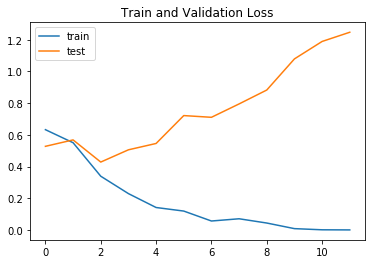

In [54]:
# optionally plot your losses
print(losses)
pd.DataFrame(losses).plot(title='Train and Validation Loss')

{'train': [63.464, 71.856, 85.88, 91.568, 94.864, 95.904, 98.248, 97.536, 98.56, 99.736, 99.952, 99.976], 'test': [72.7741935483871, 76.6774193548387, 81.25806451612904, 81.25806451612904, 78.87096774193549, 77.61290322580645, 79.19354838709677, 79.25806451612904, 79.90322580645162, 79.74193548387096, 80.7741935483871, 80.74193548387096]}


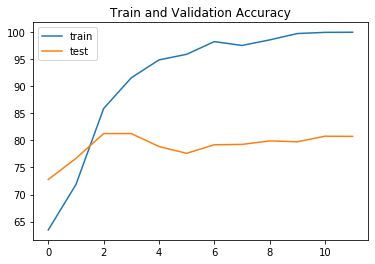

In [55]:
# optionally plot your losses
print(accuracies)
pd.DataFrame(accuracies).plot(title='Train and Validation Accuracy')

<div class='q_yellow'><b>2.8 Explore the model [2 points]</b>
    
Congrats on training your model! Hopefully you see meaningful results on a macroscopic scale (in terms of training/test loss). Now, let's explore our model from a more _microscopic_ perspective. **Please display three sentences** in the test set that (a) were classified correctly by your model and (b) were classified incorrectly **(for a grand total of 6 sentences)**. Do you notice anything interesting about these sentences that could help explain why the model classified them correctly or incorrectly? (Note: There is no particular, exact answer we are looking for here; rather, we are just looking to see if you say something reasonable, justifying, and plausible.)

In [56]:
# TODO: explore your trained model!
correct_sentences = []
incorrect_sentences = []
vocab = test_dl.dataset.vocab
index_to_word = {v: k for k, v in vocab.items()}

test_batch = next(iter(test_dl))
while len(correct_sentences)<3 and len(incorrect_sentences) < 3:
    test_word_seq, test_targets = test_batch
    test_logit_output = torch.squeeze(final_model(test_word_seq), 0)
    test_preds = torch.round(torch.sigmoid(test_logit_output))
    for i, (pred, target) in enumerate(zip(test_preds, test_targets)):
        if pred.item() == target.item():
            if len(correct_sentences) < 3:
                correct_sentences.append(i)
            else:
                continue
        else:
            #import pdb
            #pdb.set_trace()
            if len(incorrect_sentences) < 3:
                incorrect_sentences.append(i)
            else:
                continue
        if len(correct_sentences) == len(incorrect_sentences) and len(correct_sentences) == 3:
            break
    
print(correct_sentences)
print(incorrect_sentences)

print("These are correct sentences: ")
for i, idx in enumerate(correct_sentences):
    correct_tokens =  test_word_seq[i]
    sentence_words = [index_to_word[idx_tok.item()] for idx_tok in correct_tokens if idx_tok > 1]
    word = " ".join(sentence_words)
    print(f"{i + 1}. {word}, WITH TARGET SENTIMENT {test_targets[idx].item()} and PREDICTED SENTIMENT {test_preds[idx].item()}")
print("\n")
    
print("These are incorrect sentences: ")
for i, idx in enumerate(incorrect_sentences):
    incorrect_tokens =  test_word_seq[idx]
    sentence_words = [index_to_word[idx_tok.item()] for idx_tok in incorrect_tokens if idx_tok > 1]
    word = " ".join(sentence_words)
    print(f"{i + 1}. {word}, WITH TARGET SENTIMENT {test_targets[idx].item()} and PREDICTED SENTIMENT {test_preds[idx].item()}")
    

print("abc")

[0, 1, 2]
[3, 4, 12]
These are correct sentences: 
1. movie film history every way one care anyone think movie transcend criticism every flaw movie easily overcome many amaze thing movie go extremely beautiful movie doubt many u see anything like see time care count still become <UNK> every time feel hard describe one age, WITH TARGET SENTIMENT 1.0 and PREDICTED SENTIMENT 1.0
2. despite age film <UNK> <UNK> charm attraction fine survive example early british cinema underlie air <UNK> <UNK> <UNK> humour place serve demonstrate assure direction production value involve many <UNK> type film disjoint <UNK> one standard act help great deal various <UNK> character come across interest believable little gem well worth anyone attention spite one jar note film surprisingly escape <UNK> attention, WITH TARGET SENTIMENT 1.0 and PREDICTED SENTIMENT 1.0
3. enjoy movie unlike like pump <UNK> trash pas action movie play god simple realistic character believable action top enough twist turn keep inter

From the results of incorrect and correct sentences above, we can see that for the correctly predicted reviews, these revies have a lot of strong sentiment words (e.g. well, good, beautiful). And in general, when we look at the rough ideas these reviews try to convey they are either strongly positive or strongly negative, but there is no mild intention. On the contrary, on the incorrectly predicted reviews, we see that the reviews do have some strong words (either positive or negative) but there is also some mention of a positive aspect of the movie or some reviews are very neutral. Thus we see that without these strong sentiment words the model is having a hard time deciding what category they belong to.

<div class="header_yellow"> 
    
# Machine Translation 
    
</div>
</br>

Now that we've warmed up by implementing a sentiment analysis model, we're reading to try a new task: machine translation. Fortunately, we can re-use some of your work from the previous part! We now want to add a Decoder component to your architecture to perform sequence-to-sequence translation. 

Why are we doing machine translation? As we mentioned at the beginning of this notebook, your task is to help save the day by determining which language the Dark Web hackers are speaking. That is, we've obtained some text from them which seems non-sensical. However, the investigators currently suspect it's either Danish, English, German, Finnish, or Spanish.

Your first task is to assume it's English and to see how well you can translate from a bunch of their "noisy" data to English (we were fortunate to have a parallel corpus that includes the exact English equivalent of their noisy data).

The investigation includes some amazing linguists who were able to also provide parallel corpora for all other languages mentioned above. So, your second task is to consider each of these languages as the true "source" language, and aim to translate each to the "noisy" target (aka mystery language) that the hackers have been communicating with.

Best of luck!

Pictured below is our only footage of the suspects:

<img src="images/hackers1.png" width="400"><img src="images/hackers2.png" width="400"> (Fun Fact: movie star Angelina Jolie was in this movie, Hackers (1995))

### Data
Like before, we have provided pre-tokenized data for you to use. The data
files consist of a train set `mt_train_sentences.pkl`, a validation set `mt_val_sentences.pkl`, and a test set `mt_test_sentences.pkl`, 
with corresponding lists of examples from all six languages:

- Danish
- English
- German
- Finnish
- Spanish
- Mystery langauge


The file is formatted as:

```
{
    'danish': [
        [token token token ...],
        [token token token ...],
        ...
    ]
    'english': [
        [token token token ...],
        [token token token ...],
        ...
    ],
    'mystery': [
        [token token token ...],
        [token token token ...],
        ...
    ],
    # etc
}
```

The key indicates the source language, and the $n$-th sentence (`[token token token ...]`) in each list are parallel translations in one of the six languages.

Again, in short, your tasks are to:

**(a)** train your model on the mystery -> English corpus;

**(b)** train your model on each of the five pairings:
-  Danish -> Mystery
-  English -> Mystery
-  German -> Mystery
-  Finnish -> Mystery
-  Spanish -> Mystery

**Note:** these pairings are the reverse of what you did in part **a**. This is because it's natural to view the Mystery language as being the denoised version of the true, "source" language. So, we wish to model the mapping from the original source to this denoised version.

**(c)** use the results to figure out the identity of the original mystery language you've been given.

**Note:** we've randomly assigned mystery languages to each student, so your
friend's language will not match up with your own.

<div class='q_yellow'><b>2.9 Process translation data [2 points]</b>
    
In the cell below, we provide pre-processing code to load in each dataset and build in its dataloader. 
Almost everything is given to you *except* the collate function, which you will
have to implement in the same style as the previous part, but now adapted for
seq2seq translation.

Please spend some time reading through the code and playing around with the objects to make sure you understand them.  For example, we recommend that you explore a few batches in each dataloader to understand what will be fed to the model.  Recall that you can generate a batch from any dataloader `dl` with `next(iter(dl))`. 
    
</div>

In [19]:
with open("data/mt_train_sentences.pkl", "rb") as f:
    train_dict = pickle.load(f)

with open("data/mt_val_sentences.pkl", "rb") as f:
    val_dict = pickle.load(f)

with open("data/mt_test_sentences.pkl", "rb") as f:
    test_dict = pickle.load(f)

class TranslationDataset(Dataset):   
    def __init__(self, source: List[List[str]], target: List[List[str]], min_freq=3, source_vocab=None, target_vocab=None):
        super().__init__()
        
        if source_vocab is None and target_vocab is None:
            self.source_vocab, self.source_vocab_size = generate_vocab(get_word_counts(source), min_freq)
            self.target_vocab, self.target_vocab_size = generate_vocab(get_word_counts(target), min_freq)
        else:
            self.source_vocab = source_vocab
            self.source_vocab_size = len(source_vocab)

            self.target_vocab = target_vocab
            self.target_vocab_size = len(target_vocab)

        self.source, self.target = self._get_idx_dataset(source, target, self.source_vocab, self.target_vocab)
        
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, idx):
        return torch.tensor(self.source[idx]), torch.tensor(self.target[idx])

    def _get_idx_dataset(self, source: List[List[str]], target: List[List[str]], source_vocab: Dict[str, int], target_vocab: Dict[str, int]):
        source_toks = []
        target_toks = []

        for src, tar in zip(source, target):
            source_toks.append([source_vocab[token] if token in source_vocab else source_vocab["<UNK>"] for token in src] + [source_vocab["<EOS>"]])
            target_toks.append([target_vocab["<EOS>"]] + [target_vocab[token] if token in target_vocab else target_vocab["<UNK>"] for token in tar] + [target_vocab["<EOS>"]])
        
        return source_toks, target_toks

train_ds = TranslationDataset(train_dict["mystery"], train_dict["english"])
test_ds = TranslationDataset(test_dict["mystery"], test_dict["english"], source_vocab=train_ds.source_vocab, target_vocab=train_ds.target_vocab)
val_ds = TranslationDataset(val_dict["mystery"], val_dict["english"], source_vocab=train_ds.source_vocab, target_vocab=train_ds.target_vocab)

# TODO: implement this padding function
# ASK IF BASICALLY WE NEED TO PAD BOTH TENSORS in batch[0] to be of the same size or do we need to patch all 
# tensors in batch[0] (for all 32 entries) 
def pad_collate(batch: List[Tuple[torch.tensor, torch.tensor]]) -> Tuple[torch.tensor, torch.tensor]:
    batch_source_lang = [item[0] for item in batch]
    batch_target_lang = [item[1] for item in batch]
    padded_source_lang = pad_sequence(batch_source_lang, batch_first=True, padding_value=PADDING_IDX)
    padded_target_lang = pad_sequence(batch_target_lang, batch_first=True, padding_value=PADDING_IDX)
    return (padded_source_lang, padded_target_lang)
    
train_dl = DataLoader(train_ds, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl = DataLoader(test_ds, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl = DataLoader(val_ds, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)

In [20]:
batch = next(iter(train_dl))
print(batch[0])
print(batch[1])


tensor([[   4,  343,    7,    6, 1806,   33,   32,  230,  631, 1092,    2,    2,
          117,    2,    2, 1037,   21,    2, 1189,    1,    0,    0,    0,    0,
            0,    0],
        [  45,  111,    9,   10,    2,   64,   65,   29,   25,  189,    2,  144,
          267,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [  11,    8,   58,    2,    9,   10,  134,  135,  136,  249,    1,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [  11,    8,    2,  144,   20,   55,   12,    2,   29, 1324, 1325,  115,
          732,    2,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [   4,  174,   30,   18,   85,    2,    2,  276,    1,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0],
        [  25,    2,    2,    2,   74,   75,   46,  175,   29,  176, 1240, 1241,

<div class='q_yellow'><b>2.10 The LSTM Decoder [8 points]</b>
    
We are going to build a sequence-to-sequence (seq2seq) translation system.  Our seq2seq will have two major components: (1) an encoder that maps a source sentence to a tuple of (hidden, cell) vectors and (2) a decoder that uses the (hidden, cell) vectors to generate a translation.  The good news is that the encoder has already been implemented for you -- that is, you did it yourself in the previous problem!  We can simply reuse the `EncoderLSTM` that you used for the text classifier as our encoder; part of the point of this exercise is to illustrate that deep learning enables the use of common architectures for NLP problems that are quite different from one another (e.g. text classification vs. machine translation).

Thus, our next task is to build the `DecoderLSTM` object.  Like the `EncoderLSTM`, there are two main functions to implement:
- `__init__()`: Defines the layers of our network.  We will need an `Embedding` layer to encode the target vocabulary as vectors and an `LSTM` layer for decoding our target words.
- `forward()`: Takes three arguments -- (a) the `input_seqs` of the target (i.e. a batch size x sequence length tensor), (b) `hidden_init`, the last hidden state of the encoder, and (c) `cell_init`, the last cell state of the encoder.  This function will return a tuple of three tensors -- (a) the hidden states of the LSTM for all time steps, (b) the final hidden state of the LSTM, and (c) the final cell state of the LSTM.

Before moving on to the next section, we recommend testing your `forward()` function with randomly generated inputs (try  `torch.randint` for integer tensors and `torch.randn` for float/decimal tensors) to make sure it works without error.

</div>

In [21]:
class DecoderLSTM(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, padding_idx: int):
        super(DecoderLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.padding_idx = padding_idx
        self.embeddings = nn.Embedding(input_size, hidden_size)#, padding_idx=self.padding_idx) 
        self.decoder_lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True) ## ASK WHAT TO DO WITH THESE DIMENSIONS
        

    def forward(
        self, 
        input_seqs: torch.tensor, 
        hidden_init: torch.tensor, 
        cell_init: torch.tensor
    ) -> Tuple[torch.tensor, torch.tensor, torch.tensor]:
        embedding_sequences = self.embeddings(input_seqs)
        output, (hn, cn) = self.decoder_lstm(embedding_sequences, (hidden_init, cell_init))
        return (output, hn, cn)

In [22]:
encoder_model = EncoderLSTM(train_dl.dataset.source_vocab_size, 100, PADDING_IDX)
hidden_cell, final_cell = encoder_model(batch[0]) # Alias for model.forward(batch)
decoder_model = DecoderLSTM(train_dl.dataset.target_vocab_size, 100, PADDING_IDX)
decoder_model(batch[1], hidden_cell, final_cell)

(tensor([[[-0.0039,  0.0665, -0.1885,  ...,  0.1380,  0.1263, -0.0664],
          [ 0.1285,  0.0954, -0.1198,  ...,  0.3513, -0.0104,  0.2396],
          [ 0.1616,  0.0418, -0.1507,  ...,  0.0916, -0.0462,  0.0630],
          ...,
          [-0.0280, -0.0088, -0.0401,  ...,  0.2311,  0.0184, -0.1161],
          [-0.0076,  0.0426, -0.1218,  ...,  0.3435, -0.0088, -0.1698],
          [ 0.0350,  0.1646, -0.1595,  ...,  0.2306,  0.1544, -0.1141]],
 
         [[ 0.1121,  0.1323, -0.1444,  ...,  0.1270,  0.1613, -0.0353],
          [-0.0549,  0.1513, -0.0308,  ...,  0.0651,  0.1714,  0.0166],
          [-0.0044,  0.1957, -0.1001,  ...,  0.0385,  0.1159,  0.1462],
          ...,
          [ 0.0109, -0.0341, -0.1443,  ...,  0.1818,  0.1457,  0.1295],
          [-0.2653,  0.0914,  0.0268,  ...,  0.0012,  0.2801,  0.1751],
          [-0.4596,  0.1615,  0.1192,  ..., -0.0471,  0.2850,  0.1869]],
 
         [[ 0.0829,  0.1051, -0.2347,  ...,  0.1242,  0.0598, -0.0373],
          [ 0.0107,  0.0784,

<div class='q_yellow'><b>2.11 The Seq2Seq model [14 points] </b>
    
Now comes the fun part: putting everything together!  Using our `EncoderLSTM` and `DecoderLSTM` blocks, let's implement the `Seq2Seq` model below.  There are three main functions to implement:
- `__init__()`: Initializing the `Seq2Seq2` model.  You will need three blocks -- the `EncoderLSTM`, the `DecoderLSTM`, and a `Linear` projection layer to map hidden states of the decoder to the target vocabulary for word prediction.  This final projection layer should be something very familiar to you -- i.e. it serves the same role as the final projection layer in `CBOW` (word2vec) from Homework #1.
- `forward()`: This function will be used for training the model.  Machine translation models are typically trained with a concept call *teacher forcing*, in which the ground-truth tokens from the true target translation (dubbed the "teacher") are used as context to predict the next word.  Let $B$ be the batch size, $T_i$ be the sequence length for the input sequence, $T_o$ be the sequence length for the output sequence, $V_o$ be the size of the output vocabulary, and $M_o$ be the number of non-pad tokens in `output_seqs`.  Our `forward()` function will take a $B \times T_i$ `input_seqs` tensor and its corresponding target translation, the $B \times T_o$ `output_seqs` tensor, and return a tuple of (1) a flattened predictions tensor `preds` of size $M_o \times V_o$ and (2) a flattened target words tensor `targs` of length $M_o$ (Note: `targs` should not contain any padding indices).   
- `generate()`: Recall that in machine translation, training is very different from inference.  In training, we use the `forward()` function to train the model with *teacher forcing*.  However, at inference time, we don't know what the true translation is, so the model must generate the entire target sequence from scratch.  It can do this by first encoding the source sequence with the encoder and then passing the EOS token to the decoder/output_layer to get a probability distribution for the first word.  Then, it can take the most likely token from this probability distribution as the next word.  We can then feed this next word back into the decoder to get the next word after that, until our model generates the EOS token again, telling us the translation is finished.  This is the logic you will implement in the `generate()` function.  For ease of implementation, we won't batch this function.  That is, the argument `source` will be a 1D tensor of size $t_i$ and you will return a 1D translation tensor with maximium length `max_steps`.
    
</div>

In [23]:
# Helper function 
def flatten_tensors(hidden_states: torch.tensor, target: torch.tensor, padding_idx: int) -> Tuple[torch.tensor, torch.tensor]:
    trimmed_hs = []
    trimmed_targets = []
    for pair in zip(hidden_states, target):
        curr_context = pair[0]
        curr_target = pair[1]
        #ctxt_boolean_mask = ((curr_context == padding_idx).nonzero(as_tuple=True)[0])
        targ_boolean_mask = ((curr_target == padding_idx).nonzero(as_tuple=True)[0])
        if targ_boolean_mask.numel() > 0:
            first_pad_idx_targ = targ_boolean_mask.min(dim=0).values.item()
            first_pad_idx_ctxt = first_pad_idx_targ
        else:
            first_pad_idx_targ = len(curr_target)
            first_pad_idx_ctxt = first_pad_idx_targ
        cutting_idx = min(first_pad_idx_ctxt, first_pad_idx_targ)
        trimmed_hs.append(curr_context[:cutting_idx, :])
        trimmed_targets.append(curr_target[:cutting_idx])
    target = torch.cat(trimmed_targets, dim=0)
    context = torch.cat(trimmed_hs, dim=0)
    return context, target

class Seq2Seq(nn.Module):
    def __init__(self, input_vocab_size: int, output_vocab_size: int, hidden_size: int, padding_idx: int):
        super().__init__()
        self.input_vocab_size = input_vocab_size
        self.output_vocab_size = output_vocab_size
        self.hidden_size = hidden_size
        self.padding_idx = padding_idx
        self.encoder = EncoderLSTM(input_vocab_size, hidden_size, padding_idx)
        self.decoder = DecoderLSTM(output_vocab_size, hidden_size, padding_idx)
        self.linear1 = nn.Linear(hidden_size, output_vocab_size)
        
    def forward(self, input_seqs: torch.tensor, output_seqs: torch.tensor) -> Tuple[torch.tensor, torch.tensor]:
        enc_hidden_cell, enc_final_cell = self.encoder(input_seqs)
        # Trimming off ending EOS
        seqs_length = [((t == self.padding_idx).nonzero(as_tuple=True)[0])[0].item() if len(((t == self.padding_idx).nonzero(as_tuple=True)[0])) != 0 else t.shape.numel() for t in output_seqs]
        output_seqs_non_EOS = torch.stack([torch.cat([seq[:length-1], seq[length:]]) for seq, length in zip(output_seqs, seqs_length)])
        
        hidden_states, dec_final_hidden_state, dec_final_cell = self.decoder(output_seqs_non_EOS, enc_hidden_cell, enc_final_cell)
        
        # Trimming off initial EOS and ending EOS
        output_seqs = torch.stack([seq[1:] for seq in output_seqs])
        
        flatten_hidden_states, flatten_targs = flatten_tensors(hidden_states, output_seqs, self.padding_idx)
        out = self.linear1(flatten_hidden_states)
        #log_probs_2 = torch.nn.functional.log_softmax(out, dim=1)
        return out, flatten_targs
        
    @torch.no_grad()
    def generate(self, source: torch.tensor, max_steps: int, eos_idx: int) -> torch.tensor:
        translation = []
        source = torch.unsqueeze(source,0)
        enc_hidden_cell, enc_final_cell = self.encoder(source)
        blown_eos_idx = torch.tensor([[eos_idx]])
        hidden_states, dec_final_hidden_state, dec_final_cell = self.decoder(blown_eos_idx, enc_hidden_cell, enc_final_cell)
        flatten_hidden_states, flatten_targs = flatten_tensors(hidden_states, blown_eos_idx, self.padding_idx)
        enc_hidden_cell = dec_final_hidden_state
        enc_final_cell = dec_final_cell
        out = self.linear1(flatten_hidden_states)
        for i in range(1, max_steps):
            next_idx = torch.argmax(torch.tensor(out))
            translation.append(next_idx.item())
            blown_next_idx = torch.unsqueeze(torch.unsqueeze(torch.tensor(next_idx), 0), 0)
            hidden_states, dec_final_hidden_state, dec_final_cell = self.decoder(blown_next_idx, enc_hidden_cell, enc_final_cell)
            flatten_hidden_states, flatten_targs = flatten_tensors(hidden_states, blown_next_idx, self.padding_idx)
            out = self.linear1(flatten_hidden_states)
            enc_hidden_cell = dec_final_hidden_state
            enc_final_cell = dec_final_cell
            # We want to exit the for loop if the next token predicted is eos index.
            if torch.argmax(torch.tensor(out)) == eos_idx:
                next_idx = torch.argmax(torch.tensor(out))
                translation.append(next_idx.item())
                break
        return translation
        

In [24]:
seq2seq = Seq2Seq(train_dl.dataset.source_vocab_size, train_dl.dataset.target_vocab_size, 100, PADDING_IDX)
batch = next(iter(train_dl))
log_probs, targs = seq2seq(batch[0], batch[1])
test_1D_tensor = torch.tensor([1,34,2,4])
print(test_1D_tensor.shape)
translation = seq2seq.generate(torch.tensor([1,34,2,4]), 40, EOS_IDX)
print("This is translation ", translation)

torch.Size([4])
This is translation  [77, 502, 437, 988, 546, 663, 1067, 1109, 213, 64, 1021, 784, 479, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]


/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


<div class='q_yellow'><b>2.12 Train the Seq2Seq model [8 points]</b>
    
Now it's time to train the model! Implement the `train()` function below to
train your model. We've provided code that will call your `train()` to produce
a new model, and optionally plot the losses. We recommend training for at least
8 epochs to achieve desirable results.

Please use your:
* **train split** to train the model
* **validation split** to compute losses
* **test split** to evaluate the performance of your model using BLEU (in the next step)

For convenience, you may use the helper function below to compute the loss
of your model on your validation set.
    
</div>

In [25]:
@torch.no_grad()

# you do not need to edit this cell
def compute_test_loss(model, val_dl, loss_fn):
    all_preds, all_targs = [], []
    for i, (input_seqs, output_seqs) in enumerate(val_dl):
        preds, targs = model(input_seqs, output_seqs)
        all_preds.append(preds)
        all_targs.append(targs)
    preds = torch.cat(all_preds, dim=0)
    targs = torch.cat(all_targs, dim=0)
    return loss_fn(preds, targs).item()

In [26]:
def train(train_ds: Dataset, train_dl: DataLoader, val_ds: Dataset, val_dl: DataLoader):
    model = None
    losses = {
        'train': [], # keep track of your losses in these lists
        'val': []
    }
    
    model = Seq2Seq(train_dl.dataset.source_vocab_size, train_dl.dataset.target_vocab_size, 512, PADDING_IDX)
    
    loss_function = nn.CrossEntropyLoss() #NLLLoss()
    optimizer =  Adam(model.parameters(), lr=0.0001)#, weight_decay=1e-5)
    
    epochs = 15
    for epoch in range(epochs):
        train_running_loss = 0.0
        val_running_loss = 0.0
        for i, train_batch in enumerate(train_dl):
            
            train_preds, train_targets = model(train_batch[0], train_batch[1])
            train_loss = loss_function(train_preds, train_targets)
            
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
            train_running_loss += train_loss.item()
        
        model.eval()
        for i, val_batch in enumerate(val_dl):
            with torch.no_grad():
                val_preds, val_targets = model(val_batch[0], val_batch[1])
                val_loss = compute_test_loss(model, val_dl, loss_function)

                val_running_loss += val_loss#.item()

        print('Epoch %d, training_loss %.3f, validation_loss %.3f' %
            (epoch + 1, train_running_loss / len(train_dl), val_running_loss / len(val_dl)))
        
        losses['train'].append(train_running_loss/len(train_dl))
        losses['val'].append(val_running_loss/len(val_dl))
    print("Finished training!")
    
    return model, losses


Call the cell below to train your model. For reference, it takes about 1 minute to train on our machines.

Epoch 1, training_loss 4.640, validation_loss 3.673
Epoch 2, training_loss 3.658, validation_loss 3.414
Epoch 3, training_loss 3.411, validation_loss 3.250
Epoch 4, training_loss 3.250, validation_loss 3.145
Epoch 5, training_loss 3.128, validation_loss 3.069
Epoch 6, training_loss 3.019, validation_loss 3.007
Epoch 7, training_loss 2.920, validation_loss 2.945
Epoch 8, training_loss 2.825, validation_loss 2.897
Epoch 9, training_loss 2.736, validation_loss 2.847
Epoch 10, training_loss 2.650, validation_loss 2.812
Epoch 11, training_loss 2.566, validation_loss 2.788
Epoch 12, training_loss 2.480, validation_loss 2.759
Epoch 13, training_loss 2.400, validation_loss 2.740
Epoch 14, training_loss 2.319, validation_loss 2.726
Epoch 15, training_loss 2.239, validation_loss 2.712
Finished training!
CPU times: user 29min 55s, sys: 4min 49s, total: 34min 45s
Wall time: 21min 41s


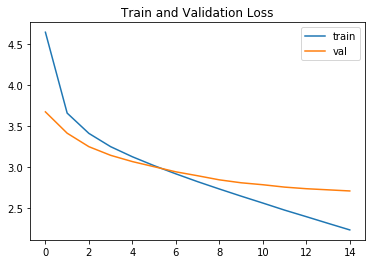

In [27]:
%%time
model, losses = train(train_ds, train_dl, val_ds, val_dl)

# optionally plot your losses
pd.DataFrame(losses).plot(title='Train and Validation Loss')

<div class='q_yellow'><b>2.13 Evaluate model performance with BLEU [2 points]</b>

While the loss is a good way of keeping track of our training progress, it is not a universal metric for our model performance. Heuristically, we have no way of telling how well our model is working for an application standpoint beyond the handful of examples we can print out -- not to mention the difficulty of comparing the quality of the translations on different models which are trained and evaluated on different datasets!

The BLEU metric was proposed to combat this discrepancy. BLEU is empirically proven to align with how humans perceive the quality of translations. In 1-2 sentences, explain what (unigram) BLEU evaluates. Only include equations as you find them necessary. May Google be your friend (or Mooogle if you've downloaded and saved a lot of web pages about Machine Translation).

My Answer: (Unigram) BLEU is a score that allows you to measure how good a machine translation is. The idea is if the translation is pretty close to a reference provided by humans, then we will get a high BLEU score. Intuitively, we look at each of the words in the translation output and see if it appears in any of the corresponding references. We will count the maximum of number of times that the word appears in any reference and divide it by the total number of tokens in the translation, thus computing modified precision of machine translation. In Unigram BLEU, we look at modified  precision of words or unigrams. 

Below is a method stub that translates all the examples from the test set, and
returns both the model's translations as well as the original translations.
This method will then be called to compute your BLEU score.

**IMPORTANT:** Pay close attention to how your translations should be formatted:
- `candidate_text`: these are the model's translations. It should have type
`List[List[str]]`. Each inner list corresponds to a list of translated words.
It should look like:

```python
    candidate_text = [
        ['this', 'is', 'sentence', 'one'],
        ['here', 'is', 'another', 'mighty', 'fine,' 'translation']
    ]
```

- `reference_text`: these are the actual translations. When BLEU is computed,
it allows for there to be more than one possible reference translation for
every machine-translated example. As a result, it has a weirder type: `List[List[List[str]]]`.
The extra nested list holds all the possible reference translation for every
one machine translation. It should look like:
```python
    reference_text = [
        [
            # these are all possible reference translations for the first machine translated example
            ['this', 'is', 'sentence', 'one'],
            ['here', 'is', 'another', 'translation', 'for', 'sentence one'],
        ],
        [
            # this example only contains one reference translation
            ['here', 'is', 'another', 'mighty', 'fine,' 'translation'],
        ]
    ]
```

Practically, because we only have a single reference translation for every
machine translation, your `reference_text` list should hold only a single
example for every machine-translated text.

For reference, we will use PyTorch's [bleu_score()](https://pytorch.org/text/stable/data_metrics.html) function
to compute these scores.

**NOTE**: `bleu_score()` is not included in the standard PyTorch installation.
You will need to install the additional package [TorchText](https://pytorch.org/text/stable/index.html)

In [28]:
def translate_corpus(vocab: Dict[str, int], test_dl: DataLoader, model: nn.Module) -> Tuple[List[List[str]], List[List[List[str]]]]:
    index_to_word = {v: k for k, v in vocab.items()}
    candidate_text = []
    reference_text = []

    for source, target in test_dl:
        current_translate_sentence = []
        current_target_sentence = []
        for source_item, target_item in zip(source, target):
            translation = model.generate(source_item, 512, EOS_IDX)
        candidate_text.append([index_to_word[idx] for idx in translation])
        reference_text.append([[index_to_word[idx.item()] for idx in target_item if idx != PADDING_IDX]])
        
    return candidate_text, reference_text

Run the cell below to compute you BLEU score. We achieved scores of around 0.3 - 0.5

Depending on how you implemented your model, your mileage may vary. Scores
less than 0.1 probably indicate something is off with your code.

In [29]:
candidate_text, reference_text = translate_corpus(train_ds.target_vocab, test_dl, model)
bleu_score(candidate_text, reference_text, max_n=1, weights=[1])

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

0.46453648791398827

<div class='q_yellow'><b>2.14 Identify the mystery language [6 points]</b>
    
You are now ready to unveil the mystery language! Train a model for each of the five different pairings:
* Danish --> Mystery
* English --> Mystery
* German --> Mystery
* Finnish --> Mystery
* Spanish --> Mystery

**NOTE:** The direction of translation is the *opposite* of what you did before
    
</div>

Epoch 1, training_loss 5.555, validation_loss 4.483
Epoch 2, training_loss 4.341, validation_loss 3.961
Epoch 3, training_loss 3.912, validation_loss 3.657
Epoch 4, training_loss 3.632, validation_loss 3.451
Epoch 5, training_loss 3.421, validation_loss 3.303
Epoch 6, training_loss 3.253, validation_loss 3.185
Epoch 7, training_loss 3.110, validation_loss 3.090
Epoch 8, training_loss 2.983, validation_loss 3.008
Epoch 9, training_loss 2.868, validation_loss 2.945
Epoch 10, training_loss 2.766, validation_loss 2.889
Epoch 11, training_loss 2.669, validation_loss 2.842
Epoch 12, training_loss 2.577, validation_loss 2.802
Epoch 13, training_loss 2.490, validation_loss 2.782
Epoch 14, training_loss 2.407, validation_loss 2.751
Epoch 15, training_loss 2.326, validation_loss 2.731
Finished training!


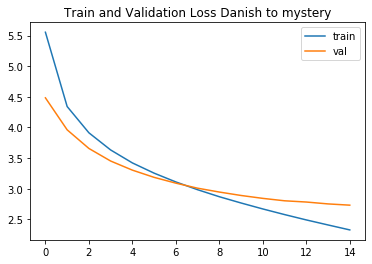

In [30]:
# TODO: train five different models, one for each of the five different pairings

train_ds_d_m = TranslationDataset(train_dict["danish"], train_dict["mystery"])
val_ds_d_m = TranslationDataset(val_dict["danish"], val_dict["mystery"], source_vocab=train_ds_d_m.source_vocab, target_vocab=train_ds_d_m.target_vocab)
test_ds_d_m = TranslationDataset(test_dict["danish"], test_dict["mystery"], source_vocab=train_ds_d_m.source_vocab, target_vocab=train_ds_d_m.target_vocab)
    
train_dl_d_m = DataLoader(train_ds_d_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl_d_m = DataLoader(test_ds_d_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl_d_m = DataLoader(val_ds_d_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)


model_d_m, losses_d_m = train(train_ds_d_m, train_dl_d_m, val_ds_d_m, val_dl_d_m)
# optionally plot your losses
pd.DataFrame(losses_d_m).plot(title='Train and Validation Loss Danish to mystery')

#raise NotImplementedError   # TODO: implement

Epoch 1, training_loss 5.517, validation_loss 4.466
Epoch 2, training_loss 4.329, validation_loss 3.956
Epoch 3, training_loss 3.913, validation_loss 3.664
Epoch 4, training_loss 3.641, validation_loss 3.462
Epoch 5, training_loss 3.436, validation_loss 3.319
Epoch 6, training_loss 3.272, validation_loss 3.199
Epoch 7, training_loss 3.126, validation_loss 3.095
Epoch 8, training_loss 2.998, validation_loss 3.011
Epoch 9, training_loss 2.881, validation_loss 2.938
Epoch 10, training_loss 2.773, validation_loss 2.880
Epoch 11, training_loss 2.671, validation_loss 2.832
Epoch 12, training_loss 2.576, validation_loss 2.798
Epoch 13, training_loss 2.487, validation_loss 2.759
Epoch 14, training_loss 2.400, validation_loss 2.744
Epoch 15, training_loss 2.319, validation_loss 2.708
Finished training!


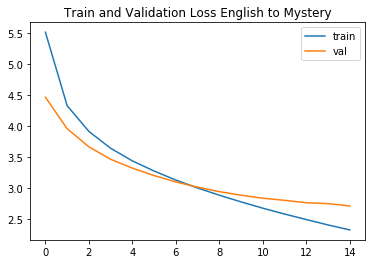

In [31]:
train_ds_e_m = TranslationDataset(train_dict["english"], train_dict["mystery"])
val_ds_e_m = TranslationDataset(val_dict["english"], val_dict["mystery"], source_vocab=train_ds_e_m.source_vocab, target_vocab=train_ds_e_m.target_vocab)
test_ds_e_m = TranslationDataset(test_dict["danish"], test_dict["mystery"], source_vocab=train_ds_e_m.source_vocab, target_vocab=train_ds_e_m.target_vocab)
    
train_dl_e_m = DataLoader(train_ds_e_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl_e_m = DataLoader(test_ds_e_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl_e_m = DataLoader(val_ds_e_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)

model_e_m, losses_e_m = train(train_ds_e_m, train_dl_e_m, val_ds_e_m, val_dl_e_m)
# optionally plot your losses
pd.DataFrame(losses_e_m).plot(title='Train and Validation Loss English to Mystery')


Epoch 1, training_loss 5.524, validation_loss 4.469
Epoch 2, training_loss 4.298, validation_loss 3.888
Epoch 3, training_loss 3.814, validation_loss 3.533
Epoch 4, training_loss 3.482, validation_loss 3.287
Epoch 5, training_loss 3.225, validation_loss 3.093
Epoch 6, training_loss 3.013, validation_loss 2.925
Epoch 7, training_loss 2.815, validation_loss 2.794
Epoch 8, training_loss 2.643, validation_loss 2.660
Epoch 9, training_loss 2.480, validation_loss 2.560
Epoch 10, training_loss 2.333, validation_loss 2.466
Epoch 11, training_loss 2.200, validation_loss 2.385
Epoch 12, training_loss 2.076, validation_loss 2.312
Epoch 13, training_loss 1.962, validation_loss 2.270
Epoch 14, training_loss 1.859, validation_loss 2.202
Epoch 15, training_loss 1.760, validation_loss 2.154
Finished training!


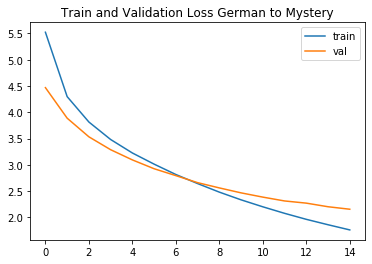

In [32]:
train_ds_g_m = TranslationDataset(train_dict["german"], train_dict["mystery"])
val_ds_g_m = TranslationDataset(val_dict["german"], val_dict["mystery"], source_vocab=train_ds_g_m.source_vocab, target_vocab=train_ds_g_m.target_vocab)
test_ds_g_m = TranslationDataset(test_dict["danish"], test_dict["mystery"], source_vocab=train_ds_g_m.source_vocab, target_vocab=train_ds_g_m.target_vocab)
    
train_dl_g_m = DataLoader(train_ds_g_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl_g_m = DataLoader(test_ds_g_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl_g_m = DataLoader(val_ds_g_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)

model_g_m, losses_g_m = train(train_ds_g_m, train_dl_g_m, val_ds_g_m, val_dl_g_m)
# optionally plot your losses
pd.DataFrame(losses_g_m).plot(title='Train and Validation Loss German to Mystery')


Epoch 1, training_loss 5.523, validation_loss 4.500
Epoch 2, training_loss 4.378, validation_loss 4.012
Epoch 3, training_loss 3.960, validation_loss 3.706
Epoch 4, training_loss 3.677, validation_loss 3.499
Epoch 5, training_loss 3.471, validation_loss 3.346
Epoch 6, training_loss 3.305, validation_loss 3.231
Epoch 7, training_loss 3.167, validation_loss 3.137
Epoch 8, training_loss 3.044, validation_loss 3.063
Epoch 9, training_loss 2.933, validation_loss 2.988
Epoch 10, training_loss 2.832, validation_loss 2.936
Epoch 11, training_loss 2.738, validation_loss 2.886
Epoch 12, training_loss 2.649, validation_loss 2.847
Epoch 13, training_loss 2.568, validation_loss 2.814
Epoch 14, training_loss 2.488, validation_loss 2.785
Epoch 15, training_loss 2.413, validation_loss 2.767
Finished training!


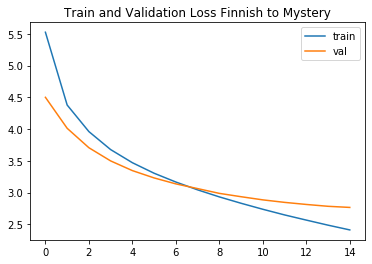

In [33]:
train_ds_f_m = TranslationDataset(train_dict["finnish"], train_dict["mystery"])
val_ds_f_m = TranslationDataset(val_dict["finnish"], val_dict["mystery"], source_vocab=train_ds_f_m.source_vocab, target_vocab=train_ds_f_m.target_vocab)
test_ds_f_m = TranslationDataset(test_dict["danish"], test_dict["mystery"], source_vocab=train_ds_f_m.source_vocab, target_vocab=train_ds_f_m.target_vocab)
    
train_dl_f_m = DataLoader(train_ds_f_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl_f_m = DataLoader(test_ds_f_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl_f_m = DataLoader(val_ds_f_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)

model_f_m, losses_f_m = train(train_ds_f_m, train_dl_f_m, val_ds_f_m, val_dl_f_m)
# optionally plot your losses
pd.DataFrame(losses_f_m).plot(title='Train and Validation Loss Finnish to Mystery')



Epoch 1, training_loss 5.543, validation_loss 4.475
Epoch 2, training_loss 4.348, validation_loss 3.977
Epoch 3, training_loss 3.928, validation_loss 3.670
Epoch 4, training_loss 3.645, validation_loss 3.466
Epoch 5, training_loss 3.436, validation_loss 3.316
Epoch 6, training_loss 3.276, validation_loss 3.208
Epoch 7, training_loss 3.138, validation_loss 3.115
Epoch 8, training_loss 3.017, validation_loss 3.038
Epoch 9, training_loss 2.907, validation_loss 2.981
Epoch 10, training_loss 2.806, validation_loss 2.919
Epoch 11, training_loss 2.711, validation_loss 2.880
Epoch 12, training_loss 2.622, validation_loss 2.837
Epoch 13, training_loss 2.537, validation_loss 2.812
Epoch 14, training_loss 2.456, validation_loss 2.785
Epoch 15, training_loss 2.377, validation_loss 2.767
Finished training!


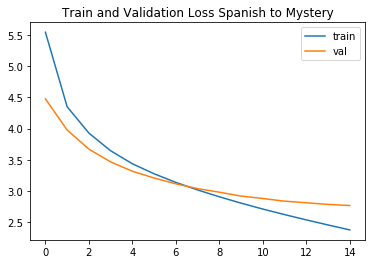

In [34]:
train_ds_s_m = TranslationDataset(train_dict["spanish"], train_dict["mystery"])
val_ds_s_m = TranslationDataset(val_dict["spanish"], val_dict["mystery"], source_vocab=train_ds_s_m.source_vocab, target_vocab=train_ds_s_m.target_vocab)
test_ds_s_m = TranslationDataset(test_dict["danish"], test_dict["mystery"], source_vocab=train_ds_s_m.source_vocab, target_vocab=train_ds_s_m.target_vocab)
    
train_dl_s_m = DataLoader(train_ds_s_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
test_dl_s_m = DataLoader(test_ds_s_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)
val_dl_s_m = DataLoader(val_ds_s_m, collate_fn=pad_collate, num_workers=0, shuffle=True, batch_size=32)

model_s_m, losses_s_m = train(train_ds_s_m, train_dl_s_m, val_ds_s_m, val_dl_s_m)
# optionally plot your losses
pd.DataFrame(losses_s_m).plot(title='Train and Validation Loss Spanish to Mystery')


Now evaluate the BLEU score of all five models on the test set. The one with the highest BLEU score, often by a noticeable shot, is the underlying language of the mystery language. Report your findings below.

In [35]:
# TODO: evaluate a BLEU score for all five models to identify the mystery language!

candidate_text_d_m, reference_text_d_m = translate_corpus(train_ds_d_m.target_vocab, test_dl_d_m, model_d_m)
bleu_score_d_m = bleu_score(candidate_text_d_m, reference_text_d_m, max_n=1, weights=[1])
print("This is bleu score for Danish to mystery ", bleu_score_d_m)

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

This is bleu score for Danish to mystery  0.3326721708345804


In [36]:
candidate_text_e_m, reference_text_e_m = translate_corpus(train_ds_e_m.target_vocab, test_dl_e_m, model_e_m)
bleu_score_e_m = bleu_score(candidate_text_e_m, reference_text_e_m, max_n=1, weights=[1])
print("This is bleu score for English to Mystery ", bleu_score_e_m)

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

This is bleu score for English to Mystery  0.1031307578086853


In [37]:
candidate_text_g_m, reference_text_g_m = translate_corpus(train_ds_g_m.target_vocab, test_dl_g_m, model_g_m)
bleu_score_g_m = bleu_score(candidate_text_g_m, reference_text_g_m, max_n=1, weights=[1])
print("This is bleu score for German to Mystery ", bleu_score_g_m)

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

This is bleu score for German to Mystery  0.176630437374115


In [38]:
candidate_text_f_m, reference_text_f_m = translate_corpus(train_ds_f_m.target_vocab, test_dl_f_m, model_f_m)
bleu_score_f_m = bleu_score(candidate_text_f_m, reference_text_f_m, max_n=1, weights=[1])
print("This is bleu score for Finnish to Mystery ", bleu_score_f_m)

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

This is bleu score for Finnish to Mystery  0.15804597735404968


In [39]:
candidate_text_s_m, reference_text_s_m = translate_corpus(train_ds_s_m.target_vocab, test_dl_s_m, model_s_m)
bleu_score_s_m = bleu_score(candidate_text_s_m, reference_text_s_m, max_n=1, weights=[1])
print("This is bleu score for Spanish to Mystery ", bleu_score_s_m)

/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/Users/jsoldevilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended 

This is bleu score for Spanish to Mystery  0.17547568678855896


What's the mystery language?: Mystery Language is Danish


<div class='header_green'>
    
<b>3. RESEARCH [20 points]</b>

</div>

As we build a foundation in NLP, it's also important to also see what the latest, cutting-edge work (research) looks like. It's incredibly worthwhile to learn about the types of problems people work on, their methodology and approach to the problem, the datasets they work on, the issues they raise, and the solutions they posit. The field moves incredibly fast, but the __approach__ to ML/NLP research is relatively stable -- different types of papers are accepted as the years progress, but that's a different story.

We want to help you get practice reading research papers, which mostly entails thinking critically about the work, being able to discern the main takeaways/conclusions, and to reflect on the work in a meaningful way.

<div class='q_green'><b>3.1: Read an NLP research paper [0 points]</b>
    
Select and read a paper that was published in ACL, NAACL, EMNLP, or COLING in 2020 or 2021. You can find a list of such published papers by searching Google (Mooogle can't help you here), a la "ACL 2020 accepted papers". For this assignment, you are allowed to pick either a short paper (4-5 pages) or long paper (8-9 pages), **but you must not select a workshop paper**. List below the name of the paper, authors, venue, and year published.

While I highly encourage you to look at the aforementioned venues to find a paper that interests you, alternatively, you could select one of the following papers:

- An LSTM-based precursor to BERT:
> context2vec: Learning Generic Context Embedding with Bidirectional LSTM. Melamud et al. CoNLL 2016.

- Clever, famous usage of Attention for NLP + Vision:
> Show, Attend and Tell: Neural Image Caption Generation with Visual Attention. Xu et al. ICML 2015.

- Breakthrough paper that illustrated the power of seq2seq for Machine Translation:
> Neural Machine Translation by Jointly Learning to Align and Translate. Bahdanau, Cho, and Bengio. ICLR 2015.

- Another famous MT paper around the same time:
> Sequence to Sequence Learning with Neural Networks. Sutskever, Vinyals, and Le. NIPS 2014 (now called NeurIPS).

</div>

The paper I chose is "Amalgamation of protein sequence, structure and textual information for improving protein-protein ineraction identification", Saha Sriparna and Dutta, which appeard in ACL 2020. 


<div class='q_green'><b>3.2: Problem? [2 point]</b> What is the problem that it is trying to address? In other words, what is it trying to solve? (2-3 sentences)
</div>

In this paper, they authors are proposing a new multi-modal dataset that isrelevatn for Protein-Protein interactions(PPI) by incorporating textual information from biomedical corpora, structural propertis of protein molecules and structuralinfromation. Additionally, the authors propose a multi-modal architecture using self attention to integrate extracted features from all the data sources. In particular, they are trying to solve the problem of having limited datasets (and types of data) for PPI tasks and proposing a new architecture to extract data from this new data source.

<div class='q_green'><b>3.3: Solution? [2 point]</b> At a very high-level, what was their solution? (2-3 sentences). Here, you don't have room to go into the small details (e.g., about the model), so you'll need to summarize the most important elements that comprised the solution.
</div>

To solve the lack of multi-modal datasets, the authors propose a new dataset for PPI interactions by combining text information from popular PPI benchmark corpora, namely BioInfer and HRPD50 datasets. Furthermore, they extracted data from the XML representations of the proteins (from the corpora mentioned above), additionally, they encoded (using DNNs) the genomic sequence and 3d structure of proteins from FASTA and RCSB protein data bank. Additionally, the authors proposed a new architecture to predict interaction between proteins that includes encoders with self-attention for combining the embeddings coming from textual information, from protein sequence and protein 3D structure.

<div class='q_green'><b>3.4: Data? [2 points]</b> What dataset(s) did they use? Are they freely available? What's the size of the data? (2-3 sentences)
</div>

This paper proposes a new dataset which in the end is available in their GitHub repo, but the sources to biuld that dataset are public and freely available. In particular these datasets are BioInfer, HRPD50, FASTA sequence and RCSB protein Data Bank. The dataset contains at least 10,000 relations since that is the size of BioInfer and HRPD50.

<div class='q_green'><b>3.5: Model [2 points]</b> Very related to the 'solutions' question, describe here any models that they used, and what made it effective (2-3 sentences)
</div>

For the solution of presenting the dataset, they find relationships between 2 or mor proteins identities from the XML representation of the corpora BioInfer and HRPD50 and once they found these relationships, they also the genomic sequence of the proteins by looking at the FASTA sequence dataset and the protein structures by looking at the RCSB Protein Data Bank archive. For the network they are proposing, they propose to do feature extraction from the proposed corpora taking text that describe the relationship between the identified proteins by using a BioBERT model to provide vector representation for the textprovided as input and after use a Bidirectional LSTM to encode the embedded representation coming out from BERT and get a vector representation. Afterwards, they extract the sequence features by applying a DNN to the vector of one-hot vector representation of the nucleotides in the protein and finally extracted the structural feature by applying Graph CNN's. Finally, they combine all the extracted features using attention mechanisms and finally passing the result to a softmax layer for classification.

<div class='q_green'><b>3.6: Results? [2 points]</b> What are their main results? (~2 sentences)
</div>

The main results of the paper come from the evaluation of the dataset using the proposed architecture. In particular, they find out that the proposed architecture surpasses all the baselines and SOTA results when predicting interaction between proteins, in particular, they get better Recall, Precision and F-score results.

<div class='q_green'><b>3.7: Strengths? [2 points]</b> List 2-3 strengths of the paper
</div>

- The proposed datasets is multi-modal, so it combines textual iformation with sequence features and 3D structure data for the proteins. This could give us a richer set of features for classification.
- The proposed network seems simple but it gives the best results for Precision, Recall and F-score, surpassing SOTA results.

<div class='q_green'><b>3.8: Weaknesses? [2 points]</b> Although you may be new to this problem and all of its content, try to list 2-3 weaknesses of the paper (anything that you think could strengthen the paper is sufficient).
</div>

- The training dataset seems rather small. Perhaps future work could focuse on expanding the corpora used for finding the probable protein interactions.
- While the methods for feaure extraction of the different types of data make sense, there is no deeper analysis on why using the attention mechanism. It would have been interesting to compare results on how to combine these features: using attention mechanism, self-attention, just concatenating and see data on why one is better than the other.

<div class='q_green'><b>3.9: Evaluation [2 points]</b>
    
How would you evaluate this paper in terms of:
- scientific contribution
- effectiveness to solve the problem
- how convincing it was.
    
Give each of these elements a score from 1-10 (10 is best). No word explanation necessary.
</div>

- Scientific contribution: 8
- Effectiveness to solve the problem: 9
- How convincing it was: 8

<div class='q_green'><b>3.10: Research Ideas [4 points]</b>
    
Think of 1-2 research ideas that you have based on this paper. It doesn't have to be grand; most research is very incremental. Specifically, your research idea should have a concrete question that you're aiming to answer. List it below. 
</div>

- As suggested in the weaknesses of the paper, I think it could be interested to expand the dataset size by using more corpora to generate the multi-modal data and furthermore, to explore different ways to combine the extracted features, not only attention mechanism but also self-attention or simple concatenation. In particular, I would like to answer the questions: 1) Does having a much larger dataset increases the gap between the metric baseline and SOTA? 2) How does changing the extracted feature combination method change the results we see?

<div class='q_green'><b>BONUS POINTS [5 points]</b> I mention the full details in the syllabus on the course website. However, in short, these bonus points cannot bring one's grade to exceed 100. That is, if someone received a 97 on this homework, doing this bonus could allow their grade to reach 100 points. If the person had an 83 on the homework, then the most they could achieve is an 88.
    
The task: read another research paper (allowed to be a Short Paper) and answer the same questions again. Please copy and paste all of the questions below.
</div>

3.1: Paper I read:

For this second paper I read "Show, attend and tell: Neural Image Caption Generation with Visual Attention" by Xu, et.al. and was suggested by the professor.


3.2: Problem? [2 point] What is the problem that it is trying to address? In other words, what is it trying to solve? (2-3 sentences)

The authors are trying to provide a new way to desscribe the contents of an image using trainable neural networks. In particular, they want to train a model that generates a short description of a presented image.

3.3: Solution? [2 point] At a very high-level, what was their solution? (2-3 sentences). Here, you don't have room to go into the small details (e.g., about the model), so you'll need to summarize the most important elements that comprised the solution.

In a very high level, the authors are proposing a network that will use a CNN to extract features from a given image by taking some of the initial layers to extract certain pieces of the network. Then, they pass these features through an LSTM which will be predicting the context vector, that is computed from attention weights and a collection of annotation vectors that correspond to features extracted at different image locations. Finally the context vectors are used to predict the next word. The paper proposes two ways of computing the context vectors, one which is stoachastic and one dterministic.


3.4: Data? [2 points] What dataset(s) did they use? Are they freely available? What's the size of the data? (2-3 sentences)

The authors used the dataset Flickr8k and Flickr30k which each have 8000 and 30000 images respectively as well as the Microsoft COCO dataset with 82783 images.They are freely available datasets.

3.5: Model [2 points] Very related to the 'solutions' question, describe here any models that they used, and what made it effective (2-3 sentences)

In gneral, the authors proposed a section to use a CNN to extract features from the input image and used features from the initial layers to get simpler features from the image. Then, these features were input for an LSTM. One of the features of the LSTM is a context vector that is computed with attention weights and certain annotation vectors $a$ that come from the features extracted from the CNN. In the proposed solution, the computation of the context vector could be stochastic (soft-attentiont) or deterministic (hard-attention).

3.6: Results? [2 points] What are their main results? (~2 sentences)

The authors showed that they produce SOTA BLEU score inall the different datasets using the hard-attention mechanism and almost SOTA results using the METEOR score. 

3.7: Strengths? [2 points] List 2-3 strengths of the paper

- I think the method proposed is simple enough and the paper provides enough intuition as to what choices of methods were made. 
- I think the paper makes a great job of providing intuition as to what the model is actually looking at in terms of features in the picture to generate the proposed text.


3.8: Weaknesses? [2 points] Although you may be new to this problem and all of its content, try to list 2-3 weaknesses 

- There were discrepancies in the results of the soft-attention and hard-attention networks. I think it would have been interesting to dig a bit deeper into the reason for difference in results.
- From the pictures they showed of where the model was paying attention, it would have been interesting on plotting a few of the first layers to see if there was a clearer choice of what layer to choose or maybe combine several layers of the CNN for generating input features for the LSTM.

3.9: Evaluation [2 points]
How would you evaluate this paper in terms of:

scientific contribution
effectiveness to solve the problem
how convincing it was.
Give each of these elements a score from 1-10 (10 is best). No word explanation necessary.

- Scientific contribution: 10
- Effectiveness to solve the problem: 9
- How convincing it was: 9


3.10: Research Ideas [4 points]
Think of 1-2 research ideas that you have based on this paper. It doesn't have to be grand; most research is very incremental. Specifically, your research idea should have a concrete question that you're aiming to answer. List it below.

- It could be interesting to measure the power of more sophisticated encoder-decoder architctures (transformers/BERT) in the image captioning task. In particular, I would like to answer the question: Can we increase the SOTA performance in the image captioning task by using transformers in my architecture.
- I think it could be interesting to see if we can use NLP architectures to do the opposite task. Take strings/captions and generate an image that represents that text. IN particular, I would like to answer the question: Can we use NLP and CV architectures to generate images based from text?

<div class='header_blue'>
    
# 4. SELF-REFLECTION [0 points]

</div>

<div class='q_blue'><b>4.1: Self-reflection and Feedback [0 points]</b>

Are you thriving in the course? Are there elements that are particularly confusing to you? I want everyone to be and feel fully supported. Toward this, I strongly urge you all to think critically about your own learning and efforts. Please provide us with feedback about how you're doing in the course and if there's anything further or different we can do to better assist your learning. I want everyone to give their earnest account, so the form is completely anonymous.

</div>

[Anonymous Self-Reflection and Feedback Form](https://forms.gle/3LT6UfhtCtqp2G7X9)